<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [3]:
hh_df = pd.read_csv(r'/home/dmg-01/downloads/dst-3.0_16_1_hh_database.csv', sep=';')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [4]:
hh_df.head()
hh_df.shape
hh_df['Ищет работу на должность:'].describe()

count                       44744
unique                      14929
top       Системный администратор
freq                         3099
Name: Ищет работу на должность:, dtype: object

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [5]:
hh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений.

In [6]:
hh_df.notnull().sum().sum()

536757

5. Выведите основную статистическую информацию о столбцах.


In [7]:
hh_df.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [9]:
hh_df['Образование'] = hh_df['Образование и ВУЗ'].apply(lambda x: x.split()[:2])
hh_df['Образование'] = hh_df['Образование'].apply(lambda x: x[:-1] if x[-1] == 'образование' else x)
hh_df['Образование'] = hh_df['Образование'].apply(lambda x: ' '.join(x))
hh_df['Образование'] = hh_df['Образование'].astype('category')
hh_df[hh_df['Образование']=='Среднее'].shape[0]

559

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [10]:
hh_df['Пол'] = hh_df['Пол, возраст'].apply(lambda x: 'М' if x[0] == 'М' else 'Ж')
hh_df['Возраст'] = hh_df['Пол, возраст'].apply(lambda x: int(x.split(' , ')[1][0:3]))
round(hh_df['Возраст'].mean())

32

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [11]:
def get_experience(ser):
    if ser is np.nan or ser == 'Не указано':
        return None
    years = ['год', 'года', 'лет']
    months = ['меcяц', 'месяца','месяцев']
    series_splitted = ser.split()[:7]
    y = 0
    m = 0
    for i, element in enumerate(series_splitted):
        if element in years:
            y = int(series_splitted[i-1])
        if element in months:
            m = int(series_splitted[i-1])
    return int(y * 12 + m)

hh_df['Опыт работы (месяц)'] = hh_df['Опыт работы'].apply(get_experience)
hh_df = hh_df.drop(['Образование и ВУЗ', 'Пол, возраст', 'Опыт работы'], axis=1)
hh_df['Опыт работы (месяц)'].median()

100.0

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [12]:
def get_cities(arg):
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']
    city = arg.split()[0]
    if city in ['Москва', 'Санкт-Петербург']:
        return city
    if city in million_cities:
        return 'город-миллионник'
    else:
        return 'другие'
hh_df['Город'] = hh_df['Город, переезд, командировки'].apply(get_cities)    
hh_df['Город'].unique()
def get_movements(arg):
    movement = arg.split(', ')[1]
    if movement.startswith('не'):
        return False
    else:
        return True
hh_df['Готовность к переезду'] = hh_df['Город, переезд, командировки'].apply(get_movements)

def get_trips(arg):
    trips = arg.split(', ')[2]
    if trips.startswith('не'):
        return False
    else:
        return True
hh_df['Готовность к командировкам'] = hh_df['Город, переезд, командировки'].apply(get_trips)
del hh_df['Город, переезд, командировки']
hh_df['Готовность к командировкам'].head()

0    False
1     True
2    False
3     True
4     True
Name: Готовность к командировкам, dtype: bool

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [13]:
hh_df['Полная занятость'] = hh_df['Занятость'].apply(lambda x: True if 'полная занятость' in x else False)
hh_df['Частичная занятость'] = hh_df['Занятость'].apply(lambda x: True if 'частичная занятость' in x else False)
hh_df['Проектная работа'] = hh_df['Занятость'].apply(lambda x: True if 'проектная работа' in x else False)
hh_df['Стажировка'] = hh_df['Занятость'].apply(lambda x: True if 'стажировка' in x else False)
hh_df['Волонтерство'] = hh_df['Занятость'].apply(lambda x: True if 'волонтерство' in x else False)
hh_df['Полный день'] = hh_df['График'].apply(lambda x: True if 'полный день' in x else False)
hh_df['Сменный график'] = hh_df['График'].apply(lambda x: True if 'сменный график' in x else False)
hh_df['Гибкий график'] = hh_df['График'].apply(lambda x: True if 'гибкий график' in x else False)
hh_df['Удаленная работа'] = hh_df['График'].apply(lambda x: True if 'удаленная работа' in x else False)
hh_df['Вахтовый метод'] = hh_df['График'].apply(lambda x: True if 'вахтовый метод' in x else False)
hh_df[(hh_df['Проектная работа'] == True) & (hh_df['Волонтерство'] == True)].shape[0] 
hh_df[(hh_df['Вахтовый метод'] == True) & (hh_df['Гибкий график'] == True)].shape[0] 

2311

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [14]:
currency = pd.read_csv(r'/home/dmg-01/project/hh_project/ExchangeRates.csv',
                        usecols=['currency', 'date', 'proportion', 'close'])

hh_df['Обновление резюме'] =  pd.to_datetime(hh_df['Обновление резюме'], yearfirst=True).dt.date
hh_df['Обновление резюме'].head()
currency['date'] = pd.to_datetime(currency['date'], dayfirst=True).dt.date
hh_df['Зарплата'] = hh_df['ЗП'].apply(lambda x: x.split()[0])
hh_df['currency'] = hh_df['ЗП'].apply(lambda x: x.split()[-1])
currency_symbols = {'грн.':'UAH','бел.руб.':'BYN', 'сум':'UZS'}
hh_df['currency'] = hh_df['currency'].apply(lambda x: currency_symbols[x] if x in currency_symbols else x)
hh_df['currency'].value_counts()
hh = hh_df.merge(currency, left_on=['Обновление резюме', 'currency'], right_on=['date', 'currency'], how='left')
hh[['close', 'proportion']] = hh[['close', 'proportion']].fillna(1)
hh[['close','currency']][hh['currency']=='USD'] 
hh['ЗП (руб)'] = (hh['Зарплата'].astype(np.int64) * hh['close']) / hh['proportion']
hh =  hh.drop(['ЗП', 'Занятость', 'График', 'currency', 'date', 'close', 'proportion'], axis=1)
hh.to_csv('/home/dmg-01/head_hunter/head_hunter.csv', sep=';')
hh.info()
hh['ЗП (руб)'].median()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44744 entries, 0 to 44743
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Ищет работу на должность:        44744 non-null  object  
 1   Последнее/нынешнее место работы  44743 non-null  object  
 2   Последняя/нынешняя должность     44742 non-null  object  
 3   Обновление резюме                44744 non-null  object  
 4   Авто                             44744 non-null  object  
 5   Образование                      44744 non-null  category
 6   Пол                              44744 non-null  object  
 7   Возраст                          44744 non-null  int64   
 8   Опыт работы (месяц)              44574 non-null  float64 
 9   Город                            44744 non-null  object  
 10  Готовность к переезду            44744 non-null  bool    
 11  Готовность к командировкам       44744 non-null  bool    
 12  Полн

59000.0

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

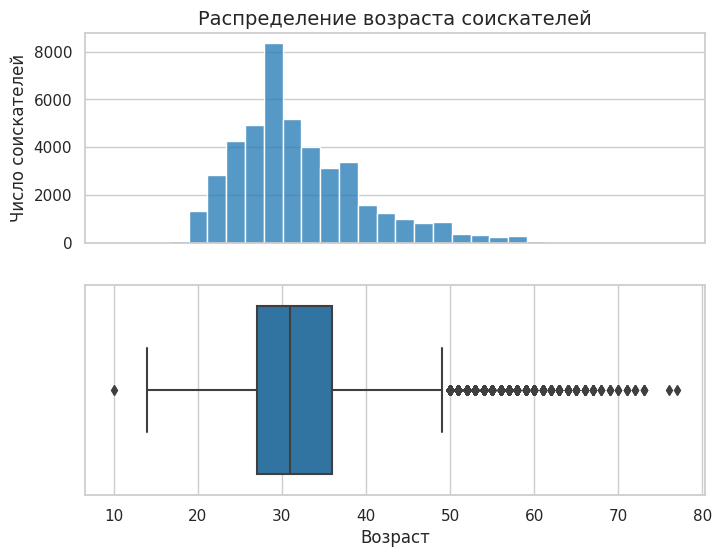

In [15]:
hh = pd.read_csv(r'/home/dmg-01/head_hunter/head_hunter.csv', sep=';', index_col='Unnamed: 0')
hh.head(0)
sns.set_style('whitegrid')
sns.set_context('notebook')
plt.figure(figsize=(8, 6))
plt.subplot(211)
sns.histplot(
    data=hh,
    x='Возраст',
    bins=30,
);
plt.xticks([])
plt.xlabel(None)

plt.ylabel('Число соискателей')
plt.title('Распределение возраста соискателей', fontsize=14)
plt.subplot(212)
sns.boxplot(
    data=hh,
    x='Возраст'
);
plt.xlabel('Возраст');

Распределение логнормальное, с перекосом вправо. Ярко выражено модальное значение возраста 31 год. Распределение возраста находится в пределах от 10 до 76 лет. Возраст большинства соискателей 14-49 лет. На коробчатой диаграмме присутствуют выбросы, однако, однозначно классифицировать выбросы справа нельзя, т.к. в теории люди такого возраста могут существовать. Слева присутствует однозначный выброс в виде возраста 10 лет.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

1188.0

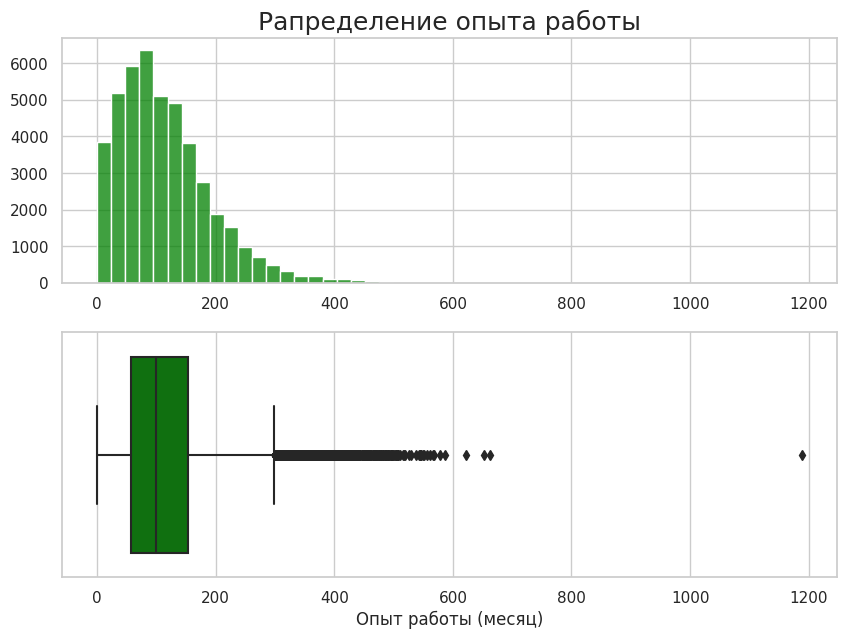

In [99]:
plt.figure(figsize=(10, 7))
plt.subplot(211)
sns.histplot(
    data=hh,
    x='Опыт работы (месяц)',
    bins=50,
    color='g'
);
plt.ylabel(None)
plt.xlabel(None)
plt.title('Рапределение опыта работы', fontsize=18)
plt.subplot(212)
sns.boxplot(
    data=hh,
    x='Опыт работы (месяц)',
    color='g'
);
hh['Опыт работы (месяц)'].max()

Распределение логнормальное. Модальное значение соответствует примерно 90-100 месяцев, т.е. 7,5 - 8 лет, что коррелирует с данными по возрасту соискателей (31 год). Большинство соискателей имеют опыт работы от от 0 до 300 месяцев. Выбросы, находящиеся за границей усов соответствуют опыту работы в 58 лет, что в принципе может быть верным, принимая во внимание сведения о возрасте соискателей. Явный аномальное значение - значение 1190 месяцев.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


In [19]:
fig = px.histogram(hh, x='ЗП (руб)',
            marginal='box',
            title='Распределение заработной платы',
            height=500,
            width=1200
            );
fig.show()

Распределение признака находится в интервале от 0 до 1.75 миллионов рублей. Значения выше 1 млн. можно, по видимому считать аномальными. Большинство соискателей рассчитывают на зарплату до 200 000 руб.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

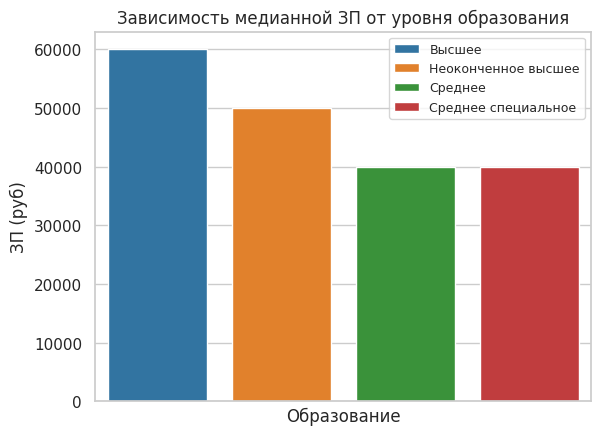

In [20]:
salary = hh[hh['ЗП (руб)'] < 1000000].groupby('Образование', as_index=False)['ЗП (руб)'].median()
plt.subplot()
barplot = sns.barplot(
    data=salary,
    x='Образование',
    y='ЗП (руб)',
    hue='Образование',
    width=0.8,
    dodge=False
);
plt.xticks([])
plt.title('Зависимость медианной ЗП от уровня образования')
plt.legend(fontsize=9);

Наибольший уровень желаемой зарплаты у соискателей с высшим образованием (медианное значение 60 000). Медианная зп соискателей со средним образованием на треть ниже (40 000). Признак уровня образования при прогнозировании заработной платы не очень важен, т.к. в современном обществе можно не иметь никакого образования, имея зп намного более высокую по сравнению с людьми высшим образованием. 

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

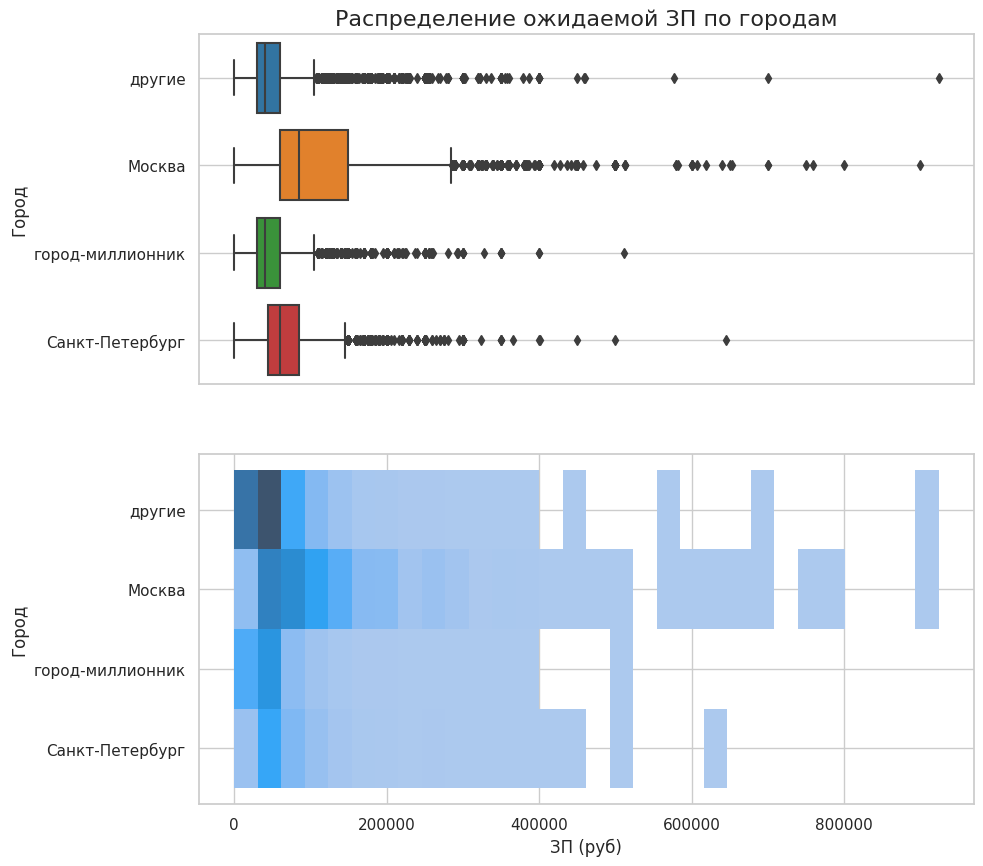

In [101]:
fig, axs = plt.subplots(figsize=(10,10), ncols=1, nrows=2)

sns.boxplot(
    data=hh,
    x=hh[hh['ЗП (руб)'] < 1000000]['ЗП (руб)'],
    y=hh['Город'],
    ax=axs[0]
); 
axs[0].set_title('Распределение ожидаемой ЗП по городам', fontsize=16)
axs[0].set_xlabel(None)
axs[0].set_xticks([])
axs[0].grid()
sns.histplot(
    y=hh['Город'],
    x=hh[hh['ЗП (руб)'] < 1000000]['ЗП (руб)'],
    bins=30,
    ax=axs[1]
);


Судя по размаху диаграмм, медианная зп в Москве значительно смещена влево, а сам размах диаграммы сильно шире, чем в других городах. Это значит, что диапазон зарплат в Москве широк (от 0 до 300к), но половина соискателей претендует на зп ниже 100к. Во других городах (в том числе и миллионниках) распределение весьма узкое, что говорит, о меньшей разнице в уровне зарплат большинства населения. В Санкт-Путербурге медианная зп немного выше. Признак города при прогнозировании зп важен. 

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

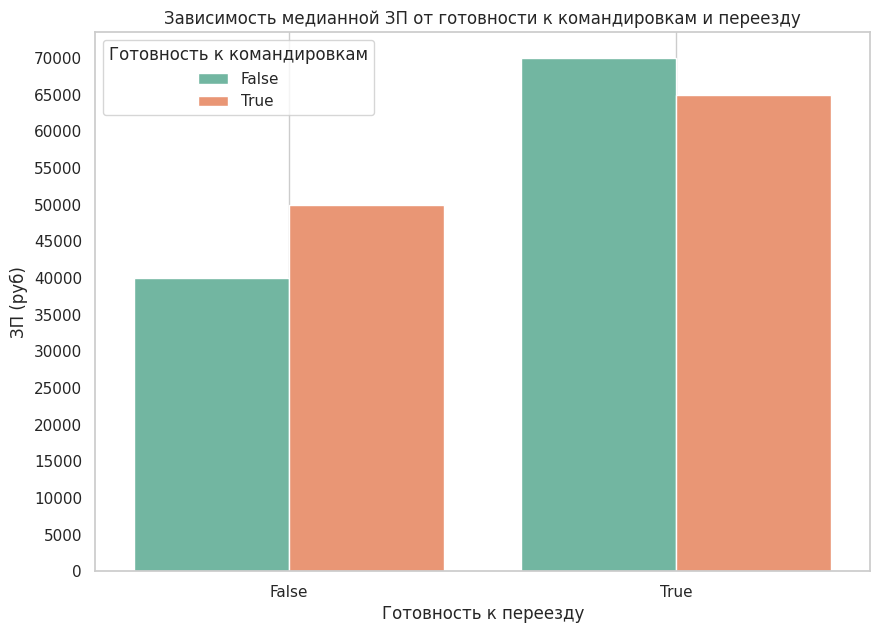

In [21]:
ready_to_trip_and_move = hh.groupby(['Готовность к переезду', 'Готовность к командировкам'],as_index=False)['ЗП (руб)'].median()
fig = plt.figure(figsize=(10, 7))

barplot = sns.barplot(
    data=ready_to_trip_and_move,
    x='Готовность к переезду',
    y='ЗП (руб)',
    hue='Готовность к командировкам',
    palette='Set2'
);
barplot.set_yticks(np.arange(0, 75000, 5000))
barplot.set_title('Зависимость медианной ЗП от готовности к командировкам и переезду')
plt.grid()

Судя по графику ожидаемая зп соискателей зависит от готовности людей пеереехать больше, чем от готовности к командировкам. ЗП людей, готовых к переезду выше по сравнению с теми, кто к переезду не готов.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

Text(0.5, 1.0, 'Тепловая карта заработной платы')

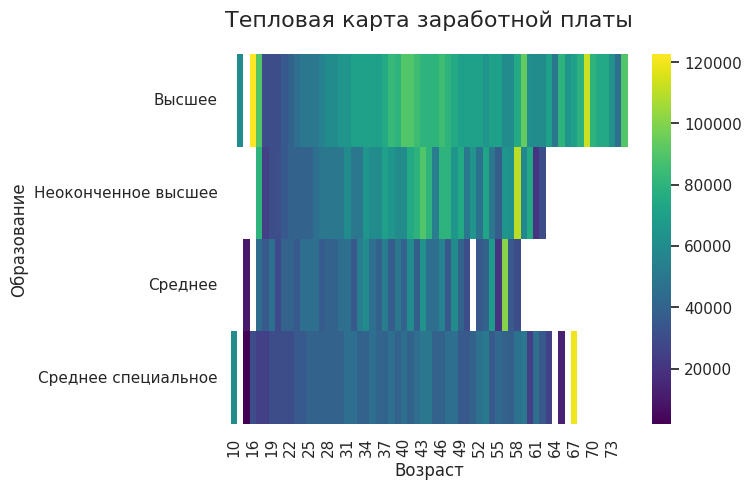

In [22]:
pivot_data = hh.groupby(by=['Возраст', 'Образование'], as_index=False)['ЗП (руб)'].median()
pivot_table = pivot_data.pivot_table(
    values='ЗП (руб)',
    columns='Возраст',
    index='Образование'
);

heatmap = sns.heatmap(
    data=pivot_table,
    cmap='viridis'
);
heatmap.set_title('Тепловая карта заработной платы', fontsize=16, pad=20)

По тепловой карте можно сказать, что с возрастом желаемая зп увеличивается, причем быстрее всего она растет в категории соискателей с высшим и неоконченным высшим. К 40 годам, соискатели из этих категорий рассчитывают получать 100-110к. Медленнее всего растет зп у соискателей со средним специальным образованием. К 40 годам там рассчитывают на 60к. 

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

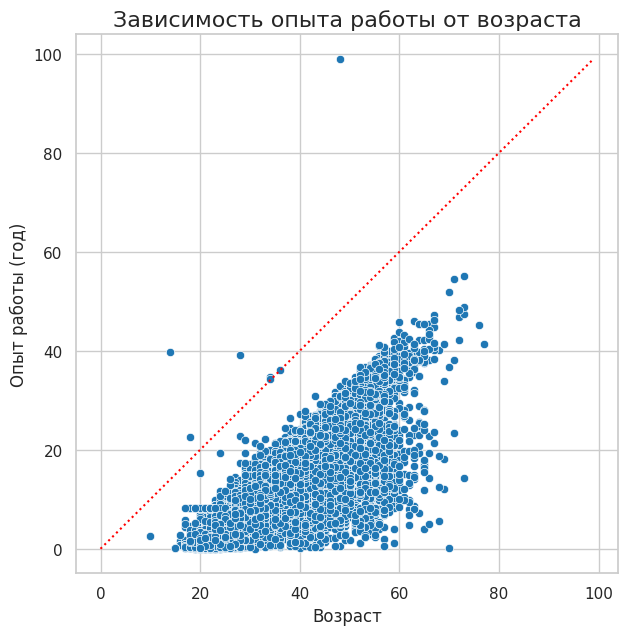

In [21]:
hh['Опыт работы (год)'] = hh['Опыт работы (месяц)'].apply(lambda x: round(x/12, 1))
fig = plt.figure(figsize=(7, 7))

scatter = sns.scatterplot(
    data=hh,
    x='Возраст',
    y='Опыт работы (год)',    
);
scatter.set_title('Зависимость опыта работы от возраста', fontsize=16)
plt.plot(np.arange(0,100), np.arange(0,100), 'r:')

Опыт работы в принципе не сильно зависит от возраста, на одной и той же координате оси "Возраст" можно найти точки, соответствующие любому опыту работы. Так, например, отметке 40 лет соответствует множество точек от 0 до 25 лет опыта. 

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


Text(0.5, 1.0, 'Распредление ЗП наиболее популярных профессий')

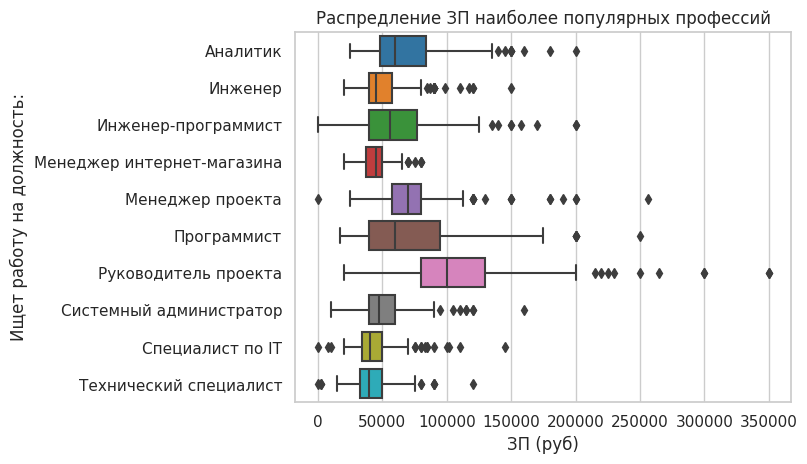

In [24]:
hh_copy = hh.copy()
hh_copy['Ищет работу на должность:'] = hh_copy['Ищет работу на должность:'].apply(lambda x: 'Менеджер проекта' if x == 'Менеджер проектов' else x)
hh_copy['Ищет работу на должность:'] = hh_copy['Ищет работу на должность:'].apply(lambda x: 'Руководитель проекта' if x == 'Руководитель проектов' else x)
hh_copy['Ищет работу на должность:'] = hh_copy['Ищет работу на должность:'].apply(lambda x: 'Технический специалист' if x == 'Специалист технической поддержки' else x)
most_popular = hh_copy['Ищет работу на должность:'].value_counts(ascending=False)[:10].index
hh_grouped = hh_copy[hh_copy['Ищет работу на должность:'].isin(most_popular)].groupby(['Ищет работу на должность:', 'Опыт работы (месяц)'], as_index=False)['ЗП (руб)'].median()
hh_grouped
sns.boxplot(
    data=hh_grouped,
    y='Ищет работу на должность:',
    x='ЗП (руб)',
);
plt.title('Распредление ЗП наиболее популярных профессий')

На графике представлены 10 наиболее популярных профессий. По оценке размаха можно сказать, наиболее сильно различаются зарплаты в категориях Программист (от 25000 до 180000) и Рководитель проекта (от 25 000 до 200 000 руб.). Медианное значение ЗП для программистов смещено влево, говоря о том что зп половины всех вакансий для программистов не превышает 70 000 руб. Это говорит о нестабильности рынка труда в этих профессиях, наличием как низкоквалифицированных, так и высооквалифицированных кадров (и соответствующих зарплат).
Узким распределением отличаются вакансии Технический специалист, Специалист по IT, Системный админстратор, Менеджер интернет-магазина. На рынке труда зарплата этих профессий стабильна и составляет 50-60 тысяч рублей, что говорит о высокой конкуренции и пересыщенности рынка труда.

[Text(0, 0, 'Женский'), Text(1, 0, 'Мужской')]

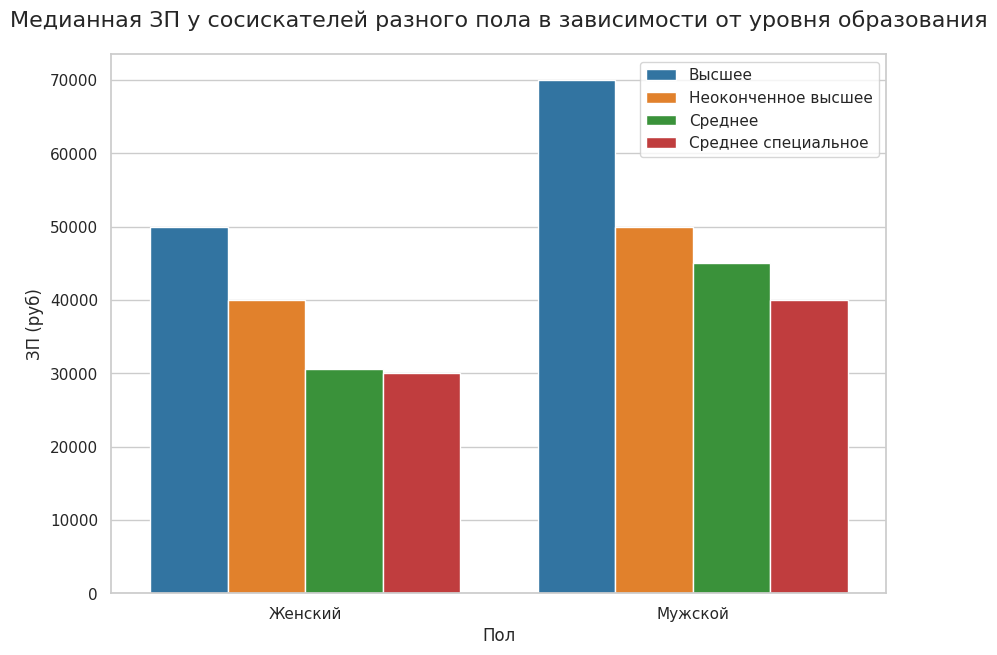

In [27]:
salary = hh.groupby(['Пол', 'Образование'], as_index=False)['ЗП (руб)'].median()
fig = plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data=salary,
    x='Пол',
    y='ЗП (руб)',
    hue='Образование'
);
plt.legend(fontsize=10)
plt.title('Медианная ЗП у сосискателей разного пола в зависимости от уровня образования', pad =20, fontsize=16)
plt.legend(bbox_to_anchor=(1,1))
barplot.set_xticks([0, 1])
barplot.set_xticklabels(['Женский', 'Мужской'])

По графику видно, что в среднем труд женщин оплачивается на 25 % ниже по сравнению с мужчинами вне зависимости от уровня образования.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [16]:
hh.duplicated().sum()
hh.drop_duplicates(inplace=True)


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [17]:
hh.isnull().sum()

Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
Полная занятость                     0
Частичная занятость                  0
Проектная работа                     0
Стажировка                           0
Волонтерство                         0
Полный день                          0
Сменный график                       0
Гибкий график                        0
Удаленная работа                     0
Вахтовый метод                       0
Зарплата                             0
ЗП (руб)                             0
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [18]:
hh.shape[0]
hh.dropna(subset=['Последняя/нынешняя должность',
                   'Последнее/нынешнее место работы'],
                    inplace=True)

hh['Опыт работы (месяц)'].fillna(hh['Опыт работы (месяц)'].median(), inplace=True)
hh['Опыт работы (месяц)'].mean().round()

114.0

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [19]:
hh_ind_outliers = hh[(hh['ЗП (руб)'] < 1000) | (hh['ЗП (руб)'] > 1000000)].index
hh = hh.drop(labels=hh_ind_outliers, axis=0)

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [22]:
hh_ind_exp_outliers = hh[hh['Опыт работы (год)'] > hh['Возраст']].index
hh = hh.drop(hh_ind_exp_outliers, axis=0)
len(hh_ind_exp_outliers)

7

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

31137    15
32950    15
33654    10
Name: Возраст, dtype: int64

3

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,Стажировка,Волонтерство,Полный день,Сменный график,Гибкий график,Удаленная работа,Вахтовый метод,Зарплата,ЗП (руб),Опыт работы (год)
31137,Менеджер по работе с клиентами,"ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,2019-06-04,Не указано,Среднее,М,15,2.0,Санкт-Петербург,...,False,False,False,True,True,True,False,10000,10000.0,0.2
32950,Тестировщик игр,OOO ЖМЫХ,Тестировщик ПО,2019-09-04,Не указано,Среднее специальное,М,15,3.0,другие,...,False,False,True,False,False,False,False,2000,2000.0,0.2
33654,Frontend-разработчик,Freelance,Frontend-разработчик,2019-04-19,Не указано,Среднее специальное,М,10,30.0,Санкт-Петербург,...,True,False,True,False,True,True,False,60000,60000.0,2.5


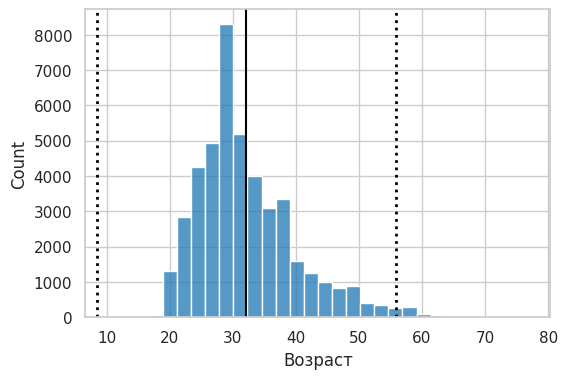

In [34]:
fig = plt.subplots(figsize=(6, 4))

histplot = sns.histplot(
    data=hh,
    x='Возраст',
    bins = 30,
    log_scale=False
);

histplot.axvline(hh['Возраст'].mean(), color = 'k', lw=1.5)
histplot.axvline(hh['Возраст'].mean() - 3 * hh['Возраст'].std(), color = 'k', lw=2, ls=':')
histplot.axvline(hh['Возраст'].mean() + 3 * hh['Возраст'].std(), color = 'k', lw=2, ls=':')

def get_outliers(df, feature, left=3, right=3, log_scale=False):
    if log_scale:
        x = np.log(df[feature] + 1)
    else:
        x = df[feature] + 1
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = df[(x < lower_bound) | (x > upper_bound)]
    cleaned = df[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = get_outliers(hh, 'Возраст', 3, 4, log_scale=True)

display(outliers['Возраст'])
display(len(outliers))
outliers

Логарифмическое распределение скошено вправо (положительно ассиметричное). В категорию выбросов попали дети от 10 до 15 лет.